In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
import warnings 

In [2]:
#Keywords = "corona", "corona virus", "covid19" 

In [3]:
#Using GetOldTweets to scrape twitter data of various keywords
!python GetOldTweets3.py --querysearch "covid19" --near "Accra, Ghana" --within 250km --since 2020-03-12 --until 2020-05-05 --maxtweets 5000000

100 200 300 400 500 600 700 800 900 1000 1100 1200 1300 1400 1500 1600 1700 1800 1900 2000 2100 2200 2300 2400 2500 2600 2700 2800 2900 2959 
Done. Output file generated "output_got.csv".


In [4]:
#Renaming the datasets
os.rename("output_got.csv","covid19.csv") 

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'output_got.csv' -> 'covid19.csv'

In [5]:
pd.set_option('display.max_colwidth', -1) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [6]:
#Create new Dataframe for each file
df1 = pd.read_csv(b"corona1.csv".decode('utf-8'))
df2 = pd.read_csv(b"corona_virus.csv".decode('utf-8'))
df3 = pd.read_csv(b"covid19.csv".decode('utf-8'))
print(df1.shape)
print(df2.shape)
print(df3.shape)


(4867, 12)
(5628, 12)
(3371, 12)


In [7]:
#concate the various dataframes by axis=0
df_copy = pd.concat([df1, df2, df3], axis=0)
df_copy.shape


(13866, 12)

In [8]:
df = df_copy.copy()

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13866 entries, 0 to 3370
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       13866 non-null  object 
 1   username   13866 non-null  object 
 2   to         3769 non-null   object 
 3   replies    13866 non-null  int64  
 4   retweets   13866 non-null  int64  
 5   favorites  13866 non-null  int64  
 6   text       13863 non-null  object 
 7   geo        0 non-null      float64
 8   mentions   2636 non-null   object 
 9   hashtags   6322 non-null   object 
 10  id         13866 non-null  int64  
 11  permalink  13866 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 1.4+ MB


In [10]:
df.columns

Index(['date', 'username', 'to', 'replies', 'retweets', 'favorites', 'text',
       'geo', 'mentions', 'hashtags', 'id', 'permalink'],
      dtype='object')

In [11]:
df = df[['date', 'id', 'retweets', 'text',]]

In [12]:
df.head()

,date,id,retweets,text
0,2020-05-04 23:59:51,1257459957856907269,0,Wait till Corona disappears ooo.
1,2020-05-04 23:59:08,1257459779427094534,0,Why he cum be say as Nigeria people full Italy reach no one of them don contact the corona virus hmmm this period b like Christmas to FG make who na Dey cash out oh thief’s
2,2020-05-04 23:58:52,1257459711437348865,0,Lol so corona works night shifts lol
3,2020-05-04 23:57:34,1257459383631577088,0,Why won't the corona spread when their lines are switched off
4,2020-05-04 23:57:31,1257459371589730306,0,Lol I pity someone’s daughter after this corona stuff is over


In [14]:
import re

In [15]:
#Clean the tweets

X = df.loc[:, "text"].values  

processed_tweets = [] 

for tweet in range(0, len(X)):

 # Remove all the special characters
    processed_tweet = re.sub(r'\W', ' ', str(X[tweet]))
 # Remove single characters from the start
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
 # Substituting multiple spaces with single space
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
 # Removing prefixed 'b'
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
 # Remove any word that start with http (links)
    processed_tweet = re.sub('https?://[A-Za-z0-9./]+','',processed_tweet)
    #processed_tweet = re.sub("<.*?>", "", processed_tweet)
# remove all single characters
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
#remove all numbers
    processed_tweet = re.sub("^\d+\s|\d+\s|\s\d+$", " ", processed_tweet)
 # Converting to Lowercase
    processed_tweet = processed_tweet.lower()
    processed_tweets.append(processed_tweet) 

In [16]:
#assign processed_tweets to a new column in the dataframe
df["cleaned"] = processed_tweets
df.tail()

,date,id,retweets,text,cleaned
3366,2020-03-12 07:52:26,1238009943959224320,0,#COVID19 Leaders are still not choosing science & facts over panic and exceedingly precautionary measures in the issue of #COVID19 @whthome @JonRHowell @FranckOKra,covid leaders are still not choosing science facts over panic and exceedingly precautionary measures in the issue of covid whthome jonrhowell franckokra
3367,2020-03-12 07:50:29,1238009455314378752,11,"This isn't the time for Africans 2 be playful about #coronavirus. We need 2 protect ourselves, and communities. #SierraLeone has set aside $1 million as part of preparedness package. Next lets limit entry of ALL from #COVID19 affected countries. Our Health workers lives matter",this isn the time for africans be playful about coronavirus we need protect ourselves and communities sierraleone has set aside million as part of preparedness package next lets limit entry of all from covid affected countries our health workers lives matter
3368,2020-03-12 07:48:39,1238008992334524416,0,Soon that fool Achipalago go release his so called trash diss to SHATTA WALE @shattawalegh he for get ready to block all SM FANS if not His Twitter account is going to hacked and bring down to condemn way! Mark this SM FANS are Dvery Dangerous than #COVID19,soon that fool achipalago go release his so called trash diss to shatta wale shattawalegh he for get ready to block all sm fans if not his twitter account is going to hacked and bring down to condemn way mark this sm fans are dvery dangerous than covid19
3369,2020-03-12 07:43:44,1238007755673346048,0,What will save us from direct impact is prevention. Citizens and foreign nationals in #COVID19 affected countries should cancel all travel to #sierraleone DO NOT take for granted.,what will save us from direct impact is prevention citizens and foreign nationals in covid affected countries should cancel all travel to sierraleone do not take for granted
3370,2020-03-12 06:58:29,1237996369249517569,1,The league will definitely be suspended cos of the pandemic eruption of #COVID19 outbreak https://twitter.com/premierleague/status/1237762472544739329 …,the league will definitely be suspended cos of the pandemic eruption of covid outbreak https twitter com premierleague status


In [17]:
#drop the existing uncleaned tweets
df = df.drop("text", axis=1)

In [18]:
df.head()

,date,id,retweets,cleaned
0,2020-05-04 23:59:51,1257459957856907269,0,wait till corona disappears ooo
1,2020-05-04 23:59:08,1257459779427094534,0,why he cum be say as nigeria people full italy reach no one of them don contact the corona virus hmmm this period like christmas to fg make who na dey cash out oh thief s
2,2020-05-04 23:58:52,1257459711437348865,0,lol so corona works night shifts lol
3,2020-05-04 23:57:34,1257459383631577088,0,why won the corona spread when their lines are switched off
4,2020-05-04 23:57:31,1257459371589730306,0,lol pity someone daughter after this corona stuff is over


In [ ]:
#Sentiments Analysis 

In [ ]:
At this stage we need to define to use Supervised or Unsupervised learning based on the data sets

In [19]:
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\DATA SCIENCE -
[nltk_data]     MN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer 

In [21]:
#retain 2000 most frequent words
#min_df shows words must occur in at least 5 documents
#max_df words occuring in more than 70% shouldnt be part

Tfidfconverter = TfidfVectorizer(max_features=2000,min_df=5, max_df=0.7, stop_words=stopwords.words("english"))
X = Tfidfconverter.fit_transform(processed_tweets).toarray()


In [22]:
y = df.iloc[:,1].values

In [ ]:
#!pip install wordcloud

In [23]:
from wordcloud import WordCloud, STOPWORDS

In [24]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [25]:
#Function to create a wordcloud for most words
def wordcloud(X,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(width=1000,height=1000,background_color="black", stopwords=stopwords,random_state= 2016, min_font_size=15).generate(" ".join([i for i in X[col]]))
    
    plt.figure(figsize=(10,10), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
 

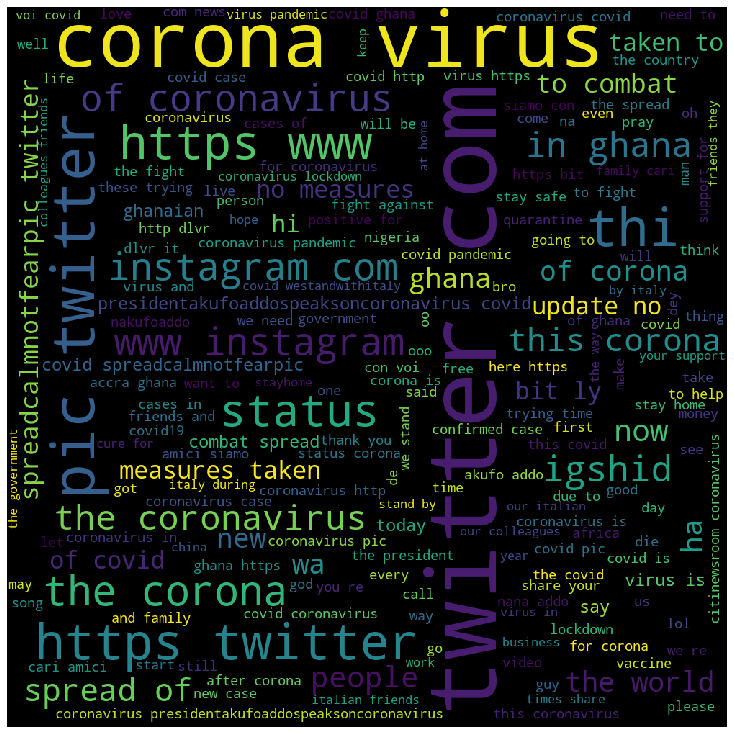

In [26]:
#Call the wordcloud fucntion with our datasets   
wordcloud(df,"cleaned") 

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
#Function to view the most words tweeted
def get_num_words(corpus, n=None):
    vec = CountVectorizer(stop_words = "english").fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0,idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [29]:
#View the top 20 most tweets
common_words = get_num_words(df["cleaned"], 20)
for word, freq in common_words:
    print(word, freq)

com 6870
corona 6543
coronavirus 5530
twitter 5329
covid 4685
virus 3534
https 3193
ghana 2268
pic 1735
status 1444
www 1142
cases 910
people 875
lockdown 709
dey 703
instagram 677
igshid 660
like 640
just 633
spread 625


In [30]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#nltk.download() 

In [31]:
Sen_A = SentimentIntensityAnalyzer()


In [32]:
df.head()

,date,id,retweets,cleaned
0,2020-05-04 23:59:51,1257459957856907269,0,wait till corona disappears ooo
1,2020-05-04 23:59:08,1257459779427094534,0,why he cum be say as nigeria people full italy reach no one of them don contact the corona virus hmmm this period like christmas to fg make who na dey cash out oh thief s
2,2020-05-04 23:58:52,1257459711437348865,0,lol so corona works night shifts lol
3,2020-05-04 23:57:34,1257459383631577088,0,why won the corona spread when their lines are switched off
4,2020-05-04 23:57:31,1257459371589730306,0,lol pity someone daughter after this corona stuff is over


In [33]:
def get_polarity(text):
    return Sen_A.polarity_scores(text)["compound"]

In [34]:
df["Sentiment"] = df["cleaned"].apply(get_polarity)



In [89]:
df[20:50]

,date,id,retweets,cleaned,Sentiment,Sentiment_value,Sentiment_word
20,2020-05-04 23:31:43,1257452878349963264,0,corona was external but you people made it internal with over cases so far and you call this competence what role has the catheral played in fight against corona,-0.0772,2,2
21,2020-05-04 23:20:26,1257450039674318849,0,that paper edey cause all this corona nonsense tbh,-0.4019,1,1
22,2020-05-04 23:19:02,1257449689500340230,0,corona baby corona,0.0000,2,2
23,2020-05-04 23:03:01,1257445656937017344,0,after corona me then you saaa,0.0000,2,2
24,2020-05-04 22:54:08,1257443420341243905,0,corona come spoil my winning streak,0.5267,3,3
25,2020-05-04 22:53:22,1257443227554254850,0,like he for keep quite ooo and enjoy his offerings like that may he thinks corona virus be adaam ni honhom hé dey take scare his church,0.6444,3,3
26,2020-05-04 22:42:13,1257440421887856641,0,one of my three year olds called me and sang for me wept god please take corona away miss them,-0.0516,2,2
27,2020-05-04 22:38:27,1257439476399439873,0,kikikiki lemme finish getting my corona body plixx,0.0000,2,2
28,2020-05-04 22:17:48,1257434279883276289,0,ei when is the corona ending for you to complete the league,0.0000,2,2
29,2020-05-04 22:15:02,1257433583398129671,0,corona virus case count check like national election results by june de god have mercy,0.7269,3,3


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13866 entries, 0 to 3370
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       13866 non-null  object 
 1   id         13866 non-null  int64  
 2   retweets   13866 non-null  int64  
 3   cleaned    13866 non-null  object 
 4   Sentiment  13866 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 650.0+ KB


In [36]:
bins = [-1.0, -0.1, 0.1, 1.0]
group_names = [1,2,3]
df['Sentiment_value'] = pd.cut(df['Sentiment'], bins, labels=group_names)
df.head()  

,date,id,retweets,cleaned,Sentiment,Sentiment_value
0,2020-05-04 23:59:51,1257459957856907269,0,wait till corona disappears ooo,-0.3400,1
1,2020-05-04 23:59:08,1257459779427094534,0,why he cum be say as nigeria people full italy reach no one of them don contact the corona virus hmmm this period like christmas to fg make who na dey cash out oh thief s,-0.4588,1
2,2020-05-04 23:58:52,1257459711437348865,0,lol so corona works night shifts lol,0.6808,3
3,2020-05-04 23:57:34,1257459383631577088,0,why won the corona spread when their lines are switched off,0.5719,3
4,2020-05-04 23:57:31,1257459371589730306,0,lol pity someone daughter after this corona stuff is over,0.1531,3


In [88]:
df[20:40]

,date,id,retweets,cleaned,Sentiment,Sentiment_value,Sentiment_word
20,2020-05-04 23:31:43,1257452878349963264,0,corona was external but you people made it internal with over cases so far and you call this competence what role has the catheral played in fight against corona,-0.0772,2,2
21,2020-05-04 23:20:26,1257450039674318849,0,that paper edey cause all this corona nonsense tbh,-0.4019,1,1
22,2020-05-04 23:19:02,1257449689500340230,0,corona baby corona,0.0000,2,2
23,2020-05-04 23:03:01,1257445656937017344,0,after corona me then you saaa,0.0000,2,2
24,2020-05-04 22:54:08,1257443420341243905,0,corona come spoil my winning streak,0.5267,3,3
25,2020-05-04 22:53:22,1257443227554254850,0,like he for keep quite ooo and enjoy his offerings like that may he thinks corona virus be adaam ni honhom hé dey take scare his church,0.6444,3,3
26,2020-05-04 22:42:13,1257440421887856641,0,one of my three year olds called me and sang for me wept god please take corona away miss them,-0.0516,2,2
27,2020-05-04 22:38:27,1257439476399439873,0,kikikiki lemme finish getting my corona body plixx,0.0000,2,2
28,2020-05-04 22:17:48,1257434279883276289,0,ei when is the corona ending for you to complete the league,0.0000,2,2
29,2020-05-04 22:15:02,1257433583398129671,0,corona virus case count check like national election results by june de god have mercy,0.7269,3,3


In [42]:
df.head() 

,date,id,retweets,cleaned,Sentiment,Sentiment_value,Sentiment_word
0,2020-05-04 23:59:51,1257459957856907269,0,wait till corona disappears ooo,-0.3400,1,1
1,2020-05-04 23:59:08,1257459779427094534,0,why he cum be say as nigeria people full italy reach no one of them don contact the corona virus hmmm this period like christmas to fg make who na dey cash out oh thief s,-0.4588,1,1
2,2020-05-04 23:58:52,1257459711437348865,0,lol so corona works night shifts lol,0.6808,3,3
3,2020-05-04 23:57:34,1257459383631577088,0,why won the corona spread when their lines are switched off,0.5719,3,3
4,2020-05-04 23:57:31,1257459371589730306,0,lol pity someone daughter after this corona stuff is over,0.1531,3,3


In [52]:
df2 = df.copy()
df2

,date,id,retweets,cleaned,Sentiment,Sentiment_value,Sentiment_word
0,2020-05-04 23:59:51,1257459957856907269,0,wait till corona disappears ooo,-0.3400,1,1
1,2020-05-04 23:59:08,1257459779427094534,0,why he cum be say as nigeria people full italy reach no one of them don contact the corona virus hmmm this period like christmas to fg make who na dey cash out oh thief s,-0.4588,1,1
2,2020-05-04 23:58:52,1257459711437348865,0,lol so corona works night shifts lol,0.6808,3,3
3,2020-05-04 23:57:34,1257459383631577088,0,why won the corona spread when their lines are switched off,0.5719,3,3
4,2020-05-04 23:57:31,1257459371589730306,0,lol pity someone daughter after this corona stuff is over,0.1531,3,3
...,...,...,...,...,...,...,...
3366,2020-03-12 07:52:26,1238009943959224320,0,covid leaders are still not choosing science facts over panic and exceedingly precautionary measures in the issue of covid whthome jonrhowell franckokra,-0.5106,1,1
3367,2020-03-12 07:50:29,1238009455314378752,11,this isn the time for africans be playful about coronavirus we need protect ourselves and communities sierraleone has set aside million as part of preparedness package next lets limit entry of all from covid affected countries our health workers lives matter,0.6124,3,3
3368,2020-03-12 07:48:39,1238008992334524416,0,soon that fool achipalago go release his so called trash diss to shatta wale shattawalegh he for get ready to block all sm fans if not his twitter account is going to hacked and bring down to condemn way mark this sm fans are dvery dangerous than covid19,-0.8934,1,1
3369,2020-03-12 07:43:44,1238007755673346048,0,what will save us from direct impact is prevention citizens and foreign nationals in covid affected countries should cancel all travel to sierraleone do not take for granted,-0.0361,2,2


In [53]:
mymap = {1:"negative", 2:"neutral", 3:"positive"}

df2["Sentiment_word"] = df2["Sentiment_word"].map(lambda s: mymap.get(s) if s in mymap else s) 

In [84]:
df2['Sentiment_value'] = df['Sentiment_value'].astype(float) 
df2['Sentiment_word'] = df['Sentiment_word'].astype(str) 


#df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')

In [75]:
df2.head()

,date,id,retweets,cleaned,Sentiment,Sentiment_value,Sentiment_word
0,2020-05-04 23:59:51,1257459957856907269,0,wait till corona disappears ooo,-0.3400,1,negative
1,2020-05-04 23:59:08,1257459779427094534,0,why he cum be say as nigeria people full italy reach no one of them don contact the corona virus hmmm this period like christmas to fg make who na dey cash out oh thief s,-0.4588,1,negative
2,2020-05-04 23:58:52,1257459711437348865,0,lol so corona works night shifts lol,0.6808,3,positive
3,2020-05-04 23:57:34,1257459383631577088,0,why won the corona spread when their lines are switched off,0.5719,3,positive
4,2020-05-04 23:57:31,1257459371589730306,0,lol pity someone daughter after this corona stuff is over,0.1531,3,positive


In [85]:
df2.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13866 entries, 0 to 3370
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             13866 non-null  object 
 1   id               13866 non-null  int64  
 2   retweets         13866 non-null  int64  
 3   cleaned          13866 non-null  object 
 4   Sentiment        13866 non-null  float64
 5   Sentiment_value  13866 non-null  float64
 6   Sentiment_word   13866 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 866.6+ KB


In [98]:
aa = df2.loc[df2["Sentiment_value"] == 1].count()[0]
bb =  df2.loc[df2["Sentiment_value"] == 2].count()[0]
cc =  df2.loc[df2["Sentiment_value"] == 3].count()[0]

In [99]:
print (aa)
print (bb)
print (cc)


3620
4769
5477


In [113]:
cc/aa

1.5129834254143646

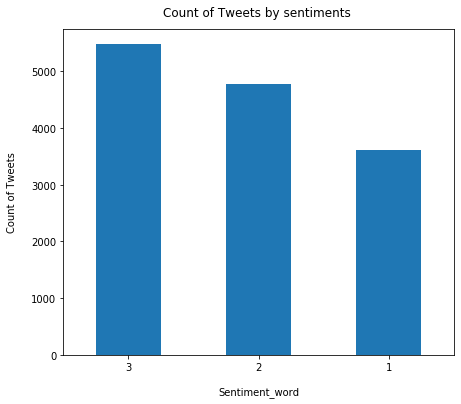

In [102]:
df2["Sentiment_word"].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment_word", labelpad=14)
plt.ylabel("Count of Tweets", labelpad=14)
plt.title("Count of Tweets by sentiments ", y=1.02);

In [106]:
df2[199:203]

,date,id,retweets,cleaned,Sentiment,Sentiment_value,Sentiment_word
199,2020-05-03 21:29:04,1257059626845167616,0,in this era of corona govt should go out and bring citizens from other nations take cue from south africa italy usa co,0.0000,2.0,2
200,2020-05-03 21:28:23,1257059453976940545,0,toronto at night nice thanks to corona my visit has been pushed farther back,0.6908,3.0,3
201,2020-05-03 21:28:06,1257059383722336256,0,i haven laughed this hard since this corona shit started,-0.2732,1.0,1
202,2020-05-03 21:28:02,1257059363883188224,0,chale this fufu date de after corona have to try daterush,0.0000,2.0,2


In [107]:
df2[1999:2003]

,date,id,retweets,cleaned,Sentiment,Sentiment_value,Sentiment_word
1999,2020-04-08 07:21:46,1247786700526370818,0,see wetin corona dey cause for here two niggas having therapy session on twitter no easy now hate any word that rhymes with sleep,-0.6597,1.0,1
2000,2020-04-08 06:15:37,1247770051668635648,0,if jesus turn water to wine why can he change this corona virus that is killing thousands of innocent souls to vitamin cameltoechallenge,-0.2023,1.0,1
2001,2020-04-08 02:24:19,1247711843029843968,0,this is not memorial wine whiskey is for life quarantinememorial jwghana jw corona memorial devtraco estates comm https www instagram com b s_g4fpbvsgsdpypjsecc7jtgdiwwm2dicrlo igshid 5kn86pdvu53m,0.3818,3.0,3
2002,2020-04-08 02:12:04,1247708761726337025,0,kwasia lei sei now you are making projections herh hw3_ni_gyimiibi today you have disappointed me paaa you see how corona come spoil finance minister ein projections all that be what go happen to you about nasty,-0.7717,1.0,1


In [109]:
df2["Sentiment_value"].value_counts()

3.0    5477
2.0    4769
1.0    3620
Name: Sentiment_value, dtype: int64